In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_2011 = pd.read_excel('online_retail.xlsx', sheet_name = 1)

In [3]:
df_2011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df_2011.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


### Initial Insights from Dataset

#### Dataset Overview
- The dataset contains 525,461 entries with 8 columns, capturing online retail transactions from 2010-12-01 to 2011-12-09.
- Key columns include `Invoice`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `Price`, `Customer ID`, and `Country`.

#### Data Summary
- **Head Summary**:
  - The `head()` function shows sample rows, indicating characteristic transactions with multiple units per invoice and varying product prices.
  - All sample entries are from the "United Kingdom," pointing to the primary market in this subset.

- **Information**:
  - `info()` indicates no missing values in most fields, but `Customer ID` has notable gaps (missing for 107,927 transactions), suggesting potential issues for customer-specific analyses.
  - Data types are appropriate for analysis, with `InvoiceDate` as datetime and numerical fields for `Quantity` and `Price`.

- **Descriptive Statistics**:
  - The `describe()` function highlights key statistics:
    - **Quantity**: Ranges widely with some negative values, suggesting returns or data entry errors.
    - **Price**: Also has negative entries, indicating potential data issues.
    - **Customer ID**: Skewed distribution with outliers, suggesting diverse purchasing power among customers.

#### Key Observations
- There are potential data quality issues with negative values in `Quantity` and `Price`, which need handling to ensure accurate analysis.
- Missing `Customer ID` values affect personalization and customer segmentation efforts.
- Understanding these initial insights is crucial for effective data cleaning, transformation, and further analysis.

These insights provide a foundational understanding of the dataset’s structure and potential challenges.

In [6]:
df_2011[df_2011['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [7]:
df_2011['Customer ID'].nunique()

4372

In [8]:
df_2011[df_2011['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
# Ensure the 'Invoice' column is of type string to allow for string operations like regex matching
df_2011["Invoice"] = df_2011["Invoice"].astype(str)

# Filter and display rows where the 'Invoice' column does not match the pattern of exactly 6 digits
# The regex pattern '^\d{6}$' ensures that the invoice number is exactly 6 digits long
df_2011[df_2011["Invoice"].str.match("^\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
# Obtain the unique non-numeric characters remaining in the 'Invoice' column 
# after removing all numeric digits using regex
df_2011["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
# Filter and display rows from df_2011 where the 'Invoice' column starts with the letter 'A'
# This can help identify specific types of transactions or special invoice categories
df_2011[df_2011["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [12]:
df_2011['StockCode'].nunique()

4070

In [13]:
# Convert the 'StockCode' column to string type to enable string operations like regex matching
df_2011["StockCode"] = df_2011["StockCode"].astype(str)

# Filter and display rows where the 'StockCode' does not match the pattern of exactly 5 digits
# The regex pattern '^\d{5}$' is used to ensure stock codes are exactly 5 digits long
df_2011[df_2011["StockCode"].str.match("^\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541841,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541847,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom
541856,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [14]:
# Identify unique 'StockCode' values that do not match standard patterns
# The line checks for codes that don't follow the pattern of exactly 5 digits 
# followed optionally by one or more letters, or just 5 digits

# Filter 'StockCode' entries that do not match either of these patterns:
# 1. '^\\d{5}[a-zA-Z]+$': A regex pattern for a sequence of exactly 5 digits followed by one or more alphabetic characters
# 2. '^\\d{5}$': A regex pattern for exactly 5 digits

# The unique() function then outputs distinct non-conforming stock code patterns

df_2011[
    (df_2011["StockCode"].str.match("^\d{5}[a-zA-Z]+$") == False) &  # Does not match 5 digits followed by letters
    (df_2011["StockCode"].str.match("^\d{5}$") == False)             # Does not match exactly 5 digits
]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

In [15]:
# Filter the 'df_2011' DataFrame for entries where 'StockCode' starts with "POST"
# Use the regex pattern '^POST', which matches any string starting with 'POST'
# Apply value_counts() to count the occurrence of each unique row that matches these criteria

df_2011[df_2011["StockCode"].str.match("^POST") == True].value_counts()

Invoice  StockCode  Description  Quantity  InvoiceDate          Price  Customer ID  Country       
536370   POST       POSTAGE       3        2010-12-01 08:45:00  18.0   12583.0      France            1
570499   POST       POSTAGE       5        2011-10-11 09:19:00  28.0   12772.0      Portugal          1
570446   POST       POSTAGE       2        2011-10-10 14:49:00  15.0   12431.0      Belgium           1
570409   POST       POSTAGE       2        2011-10-10 13:03:00  18.0   12682.0      France            1
570267   POST       POSTAGE       1        2011-10-10 10:13:00  18.0   12682.0      France            1
                                                                                                     ..
554648   POST       POSTAGE       3        2011-05-25 12:44:00  18.0   12562.0      France            1
554555   POST       POSTAGE       2        2011-05-25 10:08:00  18.0   12437.0      France            1
554363   POST       POSTAGE       2        2011-05-24 10:19:00  18.0 

In [16]:
# Filter the 'df_2011' DataFrame to select rows where the 'StockCode' consists solely of alphabetic characters
# The regex pattern '^[a-zA-Z]+$' matches strings that are entirely composed of one or more letters
df_2011[df_2011["StockCode"].str.contains("^[a-zA-Z]+$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1815,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


Stock Code

StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+
Also contains other values: | Code | Description | Action | 
DCGS | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering | | D | Looks valid, represents discount values | Exclude from clustering | | DOT | Looks valid, represents postage charges | Exclude from clustering | | M or m | Looks valid, represents manual transactions | Exclude from clustering | | C2 | Carriage transaction - not sure what this means | Exclude from clustering | | C3 | Not sure, only 1 transaction | Exclude | | BANK CHARGES or B | Bank charges | Exclude from clustering | | S | Samples sent to customer | Exclude from clustering | | TESTXXX | Testing data, not valid | Exclude from clustering | | gift__XXX | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude | | PADS | Looks like a legit stock code for padding | Include | | SP1002 | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now| | AMAZONFEE | Looks like fees for Amazon shipping or something | Exclude for now | | ADJUSTX | Looks like manual account adjustments by admins | Exclude for now |

DATA CLEANING

In [17]:
cleaned_df_2011 = df_2011.copy()

In [18]:
# Convert the 'Invoice' column in the 'cleaned_df_2011' DataFrame to string type
# This ensures that string-based operations, like regex matching, can be performed
cleaned_df_2011["Invoice"] = cleaned_df_2011["Invoice"].astype(str)

# Create a mask for filtering invoices that match exactly 6 digits
# The regex pattern '^\d{6}$' ensures that the invoice is exactly 6 digits long
mask = (
    cleaned_df_2011['Invoice'].str.match("^\d{6}$") == True
)

# Apply the mask to filter the DataFrame, retaining only rows with valid 6-digit invoices
cleaned_df_2011 = cleaned_df_2011[mask]

# Display the cleaned DataFrame, now containing only rows with properly formatted invoice numbers
cleaned_df_2011

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [19]:
# Convert the 'StockCode' column in 'cleaned_df_2011' to string type
# This is necessary for performing string operations like regex matching
cleaned_df_2011['StockCode'] = cleaned_df_2011['StockCode'].astype(str)

# Create a mask for filtering valid 'StockCode' entries
mask = (
    # Match stock codes that are exactly 5 digits
    (cleaned_df_2011['StockCode'].str.match("^\d{5}$") == True) |
    
    # Match stock codes that exactly match the string 'PADS'
    (cleaned_df_2011['StockCode'].str.match("^PADS$") == True) |
    
    # Match stock codes that have 5 digits followed by at least one letter
    (cleaned_df_2011['StockCode'].str.match("^\d{5}[a-zA-Z]") == True)
)

# Filter the DataFrame using the mask, keeping only rows that match any of the specified 'StockCode' patterns
cleaned_df_2011 = cleaned_df_2011[mask]

# Display the cleaned DataFrame, now containing only rows with valid 'StockCode' formats
cleaned_df_2011

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [20]:
# Remove rows from 'cleaned_df_2011' where the 'Customer ID' column has missing values
# - 'dropna()' with 'subset=['Customer ID']' targets rows lacking this specific identifier
# - 'inplace=True' modifies the DataFrame directly, without creating a copy

cleaned_df_2011.dropna(subset=['Customer ID'], inplace=True)

# Reasons for removing rows with missing 'Customer ID':
# - **Data Integrity**: Ensures that all remaining rows have complete customer information, which is vital for accurate analysis.
# - **Analysis Accuracy**: Customer-specific analyses (e.g., segmentation, behavior analysis) require a valid 'Customer ID' to ensure accuracy.
# - **Avoidance of Errors**: Operations that involve grouping, merging, or aggregating by 'Customer ID' can result in errors or misinterpretations if missing values are present.
# - **Meaningful Metrics**: Metrics that depend on customer data (like frequency of purchases, total spend per customer) are meaningful only with complete data.

/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_79746/3969272048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2011.dropna(subset=['Customer ID'], inplace=True)


In [21]:
cleaned_df_2011.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,396374.000000,396374,396374.000000,396374.000000
mean,13.046353,2011-07-11 00:04:48.847805440,2.867954,15301.603824
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.732689,NaN,4.264554,1709.976485


In [22]:
len(cleaned_df_2011[cleaned_df_2011['Price'] == 0])

34

In [23]:
# Filter 'cleaned_df_2011' to include only rows where 'Price' is greater than 0
# This cleans the dataset by removing entries with non-positive prices,
# which may represent errors or placeholder values that are not valid for analysis

cleaned_df_2011 = cleaned_df_2011[cleaned_df_2011['Price'] > 0]

# Reasons for removing rows with non-positive prices:
# - **Data Validity**: A non-positive price can indicate errors in data entry or issues with transaction records (e.g., returns, errors).
# - **Logical Consistency**: Products generally cannot be sold for zero or negative prices, so such entries are logically inconsistent.
# - **Analysis Integrity**: Ensuring all entries have valid prices helps maintain the integrity of any financial analysis, such as revenue calculations or pricing strategy assessments.

In [24]:
cleaned_df_2011.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,396340.000000,396340,396340.000000,396340.000000
mean,13.012456,2011-07-11 00:04:40.164908544,2.868200,15301.689070
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.640568,NaN,4.264654,1709.957487


In [25]:
# Calculate the proportion of records retained in 'cleaned_df_2011' compared to the original 'df_2011'
# This provides insight into how much data was removed during the cleaning process
len(cleaned_df_2011) / len(df_2011)

# Interpretation:
# Dropped around 23% of records:
# Around 23% of records were dropped during cleaning due to issues such as missing Customer ID, non-positive prices, or invalid stock/invoice formats.

0.7313760587551439

Dropped 23% records

**FEATURE ENGINEERING**

In [26]:
# Calculate the total sales value for each transaction line and store it in a new column 'SalesLineTotal'
# This is done by multiplying the 'Quantity' of items by the 'Price' per item
cleaned_df_2011['SalesLineTotal'] = cleaned_df_2011['Quantity'] * cleaned_df_2011['Price']

# Display the updated DataFrame, which now includes the 'SalesLineTotal' column
cleaned_df_2011

/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_79746/754802049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2011['SalesLineTotal'] = cleaned_df_2011['Quantity'] * cleaned_df_2011['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [27]:
# Group the 'cleaned_df_2011' DataFrame by 'Customer ID' to perform aggregation
aggregated_df_2011 = cleaned_df_2011.groupby('Customer ID', as_index=False).agg(
    # Calculate the total monetary value for each customer as the sum of 'SalesLineTotal'
    MonetaryValue=('SalesLineTotal', 'sum'),

    # Calculate the purchase frequency as the number of unique invoices for each customer
    Frequency=('Invoice', 'nunique'),

    # Get the date of the last invoice for each customer
    LastInvoiceDate=('InvoiceDate', 'max')
)

# Display the first few rows of the aggregated DataFrame to review the results
aggregated_df_2011.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00


In [28]:
# Determine the most recent invoice date across all customers
max_invoice_date = aggregated_df_2011['LastInvoiceDate'].max()

# Calculate 'Recency' for each customer, indicating the number of days since their last purchase
# This is done by subtracting 'LastInvoiceDate' from 'max_invoice_date' and converting it to days
aggregated_df_2011['Recency'] = (max_invoice_date - aggregated_df_2011['LastInvoiceDate']).dt.days

# Display the first few rows of the DataFrame to verify the 'Recency' calculations
aggregated_df_2011.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309


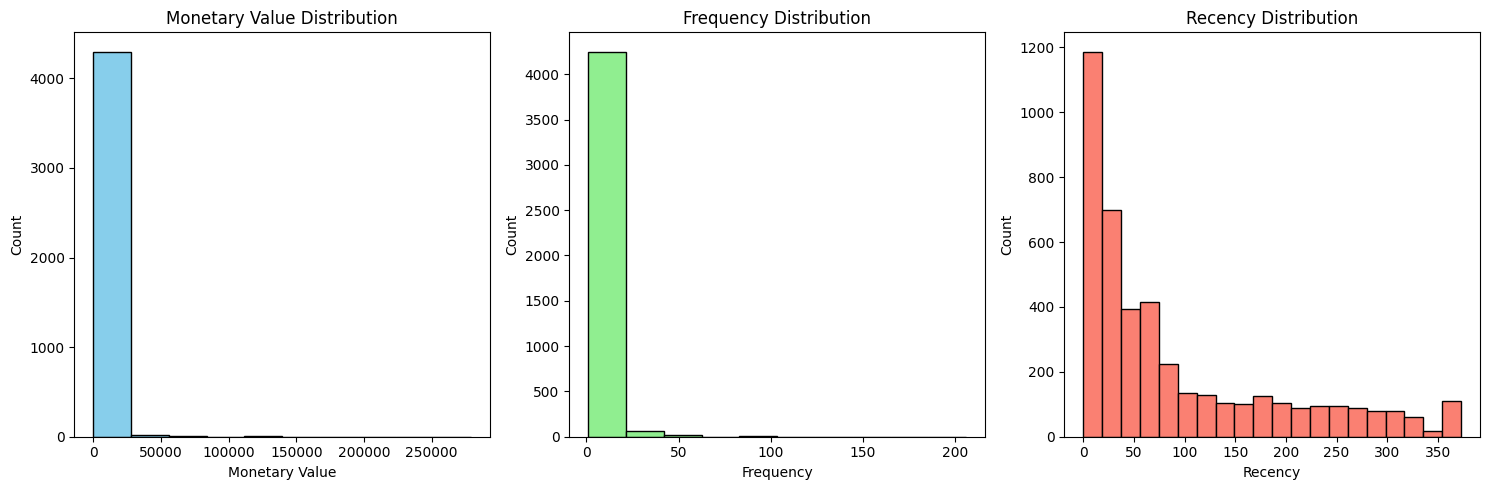

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df_2011['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df_2011['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df_2011['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Interpretation of Distributions

#### 1. Monetary Value Distribution
- **Observation**: The distribution is highly skewed to the right, with nearly all customers having a low monetary value.
- **Interpretation**: A very small number of customers contribute disproportionately to the revenue, highlighting significant revenue generation from a minimal customer base. This underscores the importance of focused marketing and personalized engagement for high-value customers.

#### 2. Frequency Distribution
- **Observation**: Most customers have a very low purchase frequency, with very few making purchases frequently.
- **Interpretation**: The majority of customers purchase infrequently, suggesting a strong potential to boost customer engagement. Consider implementing loyalty programs or strategies to promote more frequent purchases.

#### 3. Recency Distribution
- **Observation**: The distribution shows that a large number of customers have made recent purchases, but there are many who have not purchased in a while.
- **Interpretation**: The recent activity indicates positive customer engagement, yet the presence of inactive customers suggests opportunities for re-engagement campaigns to bring back lapsed customers.

#### Overall Insight
- The data highlights the need to focus on retaining and nurturing high-value customers while developing strategies to boost purchase frequency and reactivate dormant customers. These insights can guide targeted marketing initiatives and enhance customer relationship management efforts.

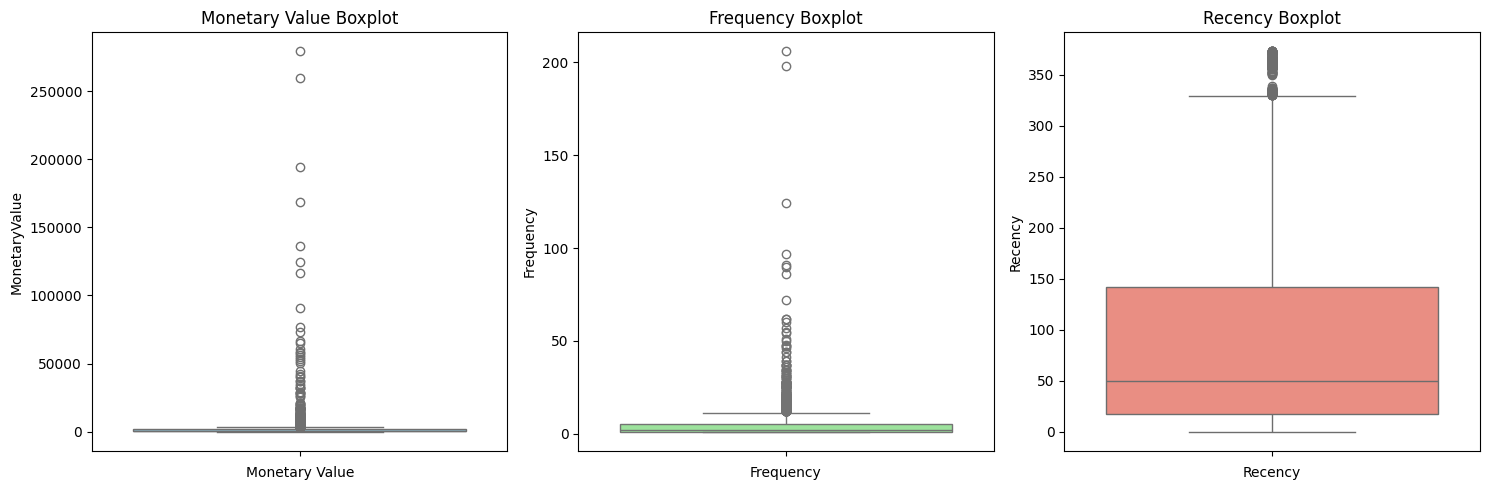

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df_2011['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df_2011['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df_2011['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Interpretation of Boxplots

#### 1. Monetary Value Boxplot
- **Observation**: There are many extreme outliers with exceptionally high monetary values.
- **Interpretation**: These outliers likely represent high-value customers or bulk purchases. Analyzing them separately could provide insights into high-revenue segments or unusual purchasing behaviors.

#### 2. Frequency Boxplot
- **Observation**: Similar to monetary value, there are several outliers with high purchase frequency.
- **Interpretation**: Most customers make a few purchases, while a small number make frequent purchases. Targeting these frequent customers could enhance engagement and loyalty programs.

#### 3. Recency Boxplot
- **Observation**: The distribution is skewed, with many outliers representing customers who haven't purchased in a while.
- **Interpretation**: The spread and outliers suggest varying levels of customer engagement. Recent buyers appear clustered, while those with high recency may need re-engagement efforts.

#### Overall Insight
- The boxplots highlight the presence of significant outliers, suggesting varied customer behaviors. Targeted strategies can be developed for high-value and frequent purchasers, while re-engagement efforts can focus on those with high recency values.

In [31]:
# Calculate the first quartile (Q1) of the 'MonetaryValue' column
M_Q1 = aggregated_df_2011['MonetaryValue'].quantile(0.25)

# Calculate the third quartile (Q3) of the 'MonetaryValue' column
M_Q3 = aggregated_df_2011['MonetaryValue'].quantile(0.75)

# Calculate the interquartile range (IQR)
M_IQR = M_Q3 - M_Q1

# Identify outliers in 'MonetaryValue' using the IQR method
# Outliers are detected as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
monetary_outliers_2011 = aggregated_df_2011[
    (aggregated_df_2011['MonetaryValue'] < M_Q1 - 1.5 * M_IQR) |
    (aggregated_df_2011['MonetaryValue'] > M_Q3 + 1.5 * M_IQR)
].copy()

# Display summary statistics for the identified outliers
monetary_outliers_2011.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,425.000000,425.000000,425.000000,425,425.000000
mean,15033.644706,12568.004141,16.647059,2011-11-14 08:29:09.741176576,24.724706
min,12346.000000,3622.680000,1.000000,2010-12-02 15:27:00,0.000000
25%,13324.000000,4359.320000,8.000000,2011-11-15 14:22:00,3.000000
50%,15005.000000,5891.610000,12.000000,2011-11-29 12:09:00,10.000000
75%,16655.000000,9430.520000,19.000000,2011-12-06 12:09:00,23.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1797.854931,26097.899415,19.066978,NaN,47.076383


In [32]:
monetary_outliers_2011.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32
12,12359.0,6372.58,4,2011-10-13 12:47:00,57
15,12362.0,4737.23,10,2011-12-06 15:40:00,2


In [33]:
# Calculate the first quartile (Q1) of the 'Frequency' column
F_Q1 = aggregated_df_2011['Frequency'].quantile(0.25)

# Calculate the third quartile (Q3) of the 'Frequency' column
F_Q3 = aggregated_df_2011['Frequency'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'Frequency'
F_IQR = F_Q3 - F_Q1

# Identify outliers in 'Frequency' using the IQR method
# Outliers are detected as values above Q3 + 1.5*IQR or below Q1 - 1.5*IQR
frequency_outliers_df_2011 = aggregated_df_2011[
    (aggregated_df_2011['Frequency'] > (F_Q3 + 1.5 * F_IQR)) |
    (aggregated_df_2011['Frequency'] < (F_Q1 - 1.5 * F_IQR))
].copy()

# Display summary statistics for the identified frequency outliers
frequency_outliers_df_2011.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,278.000000,278.000000,278.000000,278,278.000000
mean,15355.669065,14488.006691,23.089928,2011-11-25 21:49:19.640287744,13.165468
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,0.000000
25%,13880.250000,4197.772500,13.000000,2011-11-23 20:17:15,2.000000
50%,15290.500000,6283.525000,17.000000,2011-12-03 13:42:00,5.500000
75%,16781.250000,11040.835000,25.000000,2011-12-07 12:15:30,15.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1745.001840,30142.778160,21.166586,NaN,30.366616


In [34]:
# Filter the DataFrame to include only non-outlier entries based on monetary and frequency outliers
# Use the ~ operator to invert the boolean indexing (i.e., select where the condition is False)
non_outliers_df_2011 = aggregated_df_2011[
    (~aggregated_df_2011.index.isin(monetary_outliers_2011.index)) &
    (~aggregated_df_2011.index.isin(frequency_outliers_df_2011.index))
]

# Display summary statistics for the non-outlier entries
non_outliers_df_2011.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3863.000000,3863.000000,3863.000000,3863,3863.000000
mean,15323.852705,853.814417,2.755113,2011-08-31 01:42:04.721718784,99.943826
min,12348.000000,3.750000,1.000000,2010-12-01 09:53:00,0.000000
25%,13850.500000,278.500000,1.000000,2011-07-01 15:21:00,21.000000
50%,15333.000000,570.460000,2.000000,2011-10-11 14:24:00,58.000000
75%,16798.000000,1187.005000,4.000000,2011-11-17 13:39:00,160.000000
max,18287.000000,3619.170000,11.000000,2011-12-09 12:50:00,373.000000
std,1709.731704,794.608100,2.168124,NaN,101.866688


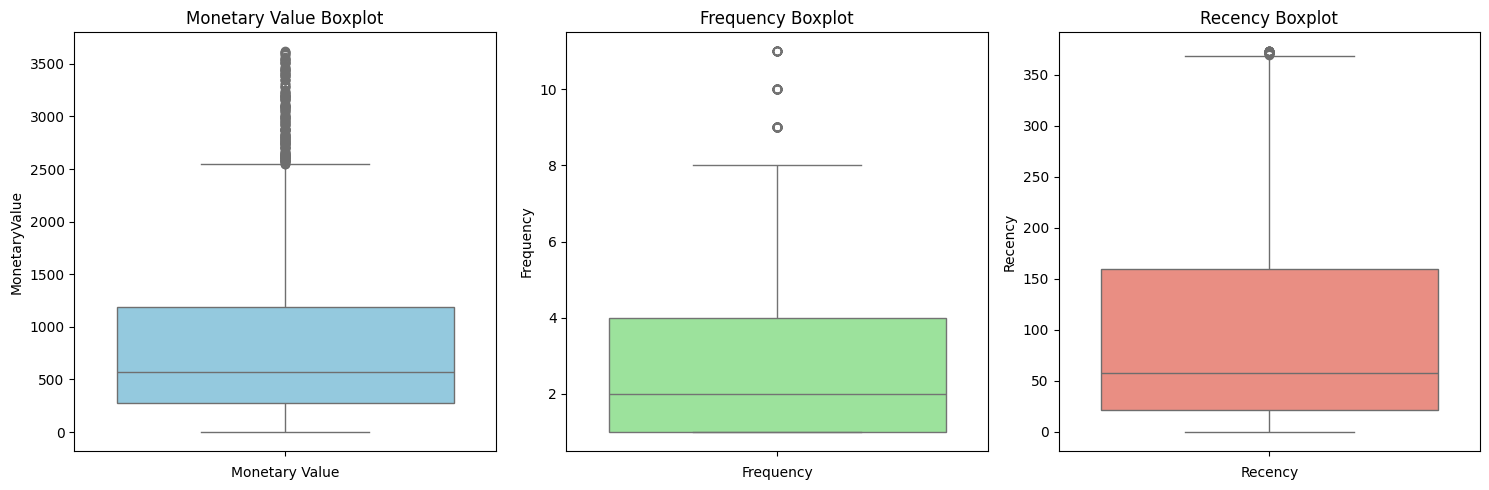

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df_2011['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df_2011['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df_2011['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Interpretation of Boxplots (Non-Outliers)

#### 1. Monetary Value Boxplot
- **Observation**: The distribution of monetary value shows moderate skewness with some outliers.
- **Interpretation**: While most customers cluster around the lower monetary values, there are still a few outliers. This indicates that some customers continue to make notably higher-value purchases, but the range has been narrowed compared to the full dataset.

#### 2. Frequency Boxplot
- **Observation**: The frequency distribution reveals fewer outliers, with most data centralized.
- **Interpretation**: Customer purchase frequency is generally low, with outliers making more frequent purchases remaining in the dataset. This suggests typical purchase behavior with minimal deviation.

#### 3. Recency Boxplot
- **Observation**: The recency distribution is relatively spread out, with fewer outliers.
- **Interpretation**: Customers generally made recent purchases, but there are still a few who haven't purchased for an extended period. This indicates stable recent engagement with minimal extremes.

#### Overall Insight
- These boxplots of non-outliers depict a more centralized distribution, reflecting typical customer behaviors and purchase patterns after removing the extreme values. This provides a clearer picture of the main customer base and helps focus on typical engagement strategies.

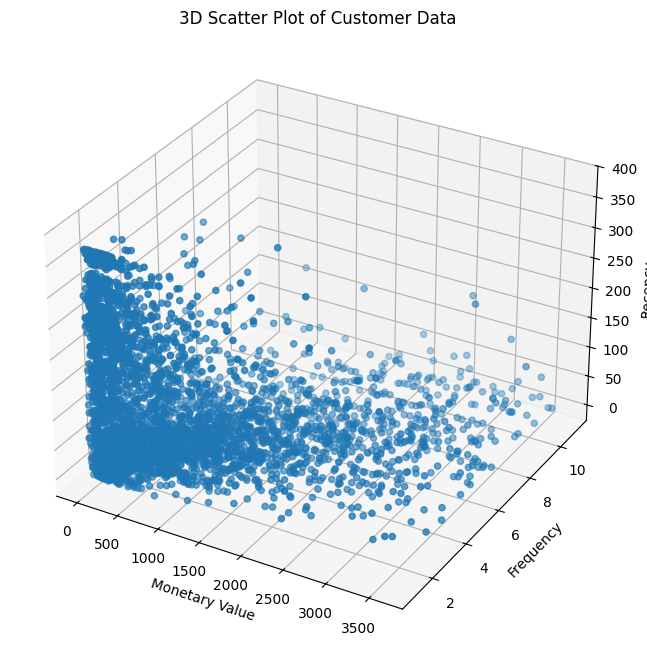

In [36]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df_2011['MonetaryValue'], non_outliers_df_2011['Frequency'], non_outliers_df_2011['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

### Interpretation of 3D Scatter Plot of Customer Data

#### Overview
- The 3D scatter plot visualizes the relationship between Monetary Value, Frequency, and Recency for each customer.

#### Insights
- **Concentration**: Data points are densely clustered at lower values for Monetary Value and Frequency, spanning a range of Recency. This suggests that most customers are newer with moderate spending and an average purchase frequency.
- **Monetary Value vs. Frequency**: There's dispersion along the Monetary Value and Frequency axes, indicating that higher-spending customers might not always be frequent buyers, and vice versa.
- **Recency Spread**: The variety in Recency shows that while many customers have made recent purchases, some have lapsed, as indicated by data points further away from zero on the Recency axis.

#### Implications
- **Customer Segmentation**: The plot aids in visualizing segments such as high-value, frequent buyers or new, low-value, infrequent purchasers.
- **Targeted Strategies**: Identifying clusters can inform tailored marketing or retention strategies, focusing on improving engagement for lower-frequency customers or re-engaging those with high Recency values.

This 3D visualization provides a holistic view of customer behavior, aiding in strategic decision-making based on customer activity patterns.

In [37]:
# Initialize the StandardScaler, which will standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Apply the scaler to the selected columns: 'MonetaryValue', 'Frequency', and 'Recency'
# This operation transforms the data to have a mean of 0 and a standard deviation of 1
scaled_data_2011 = scaler.fit_transform(non_outliers_df_2011[['MonetaryValue', 'Frequency', 'Recency']])

# Convert the scaled array back into a DataFrame, maintaining the original index and column names
scaled_data_2011 = pd.DataFrame(scaled_data_2011, index=non_outliers_df_2011.index, columns=['MonetaryValue', 'Frequency', 'Recency'])

# Display the standardized data
scaled_data_2011

,MonetaryValue,Frequency,Recency
2,0.734326,0.574252,-0.254717
3,0.759889,-0.809612,-0.804526
4,-0.704104,-0.809612,2.052518
5,0.669505,1.958116,-0.637620
6,-0.962630,-0.809612,1.011808
...,...,...,...
4328,-0.855771,-0.809612,-0.264535
4329,-0.847338,-0.809612,1.738342
4330,-0.972926,-0.809612,0.785993
4331,-0.850547,-0.348324,-0.912525


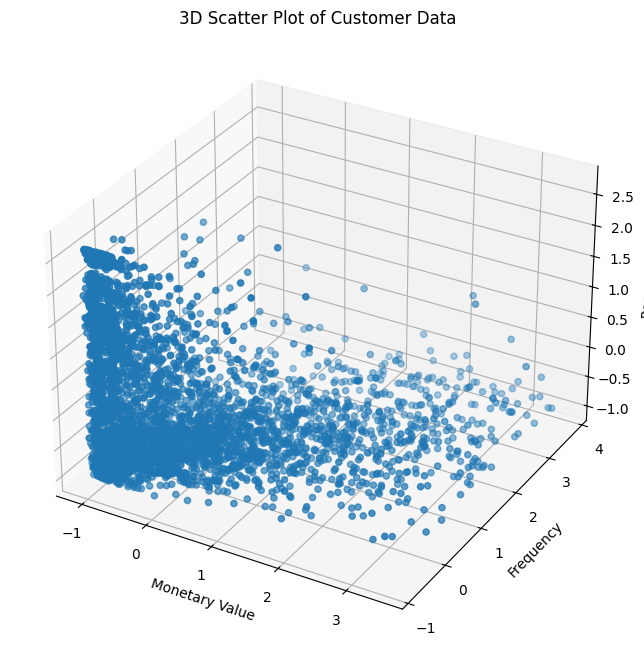

In [38]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_2011['MonetaryValue'], scaled_data_2011['Frequency'], scaled_data_2011['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

KMEANS CLUSTERING

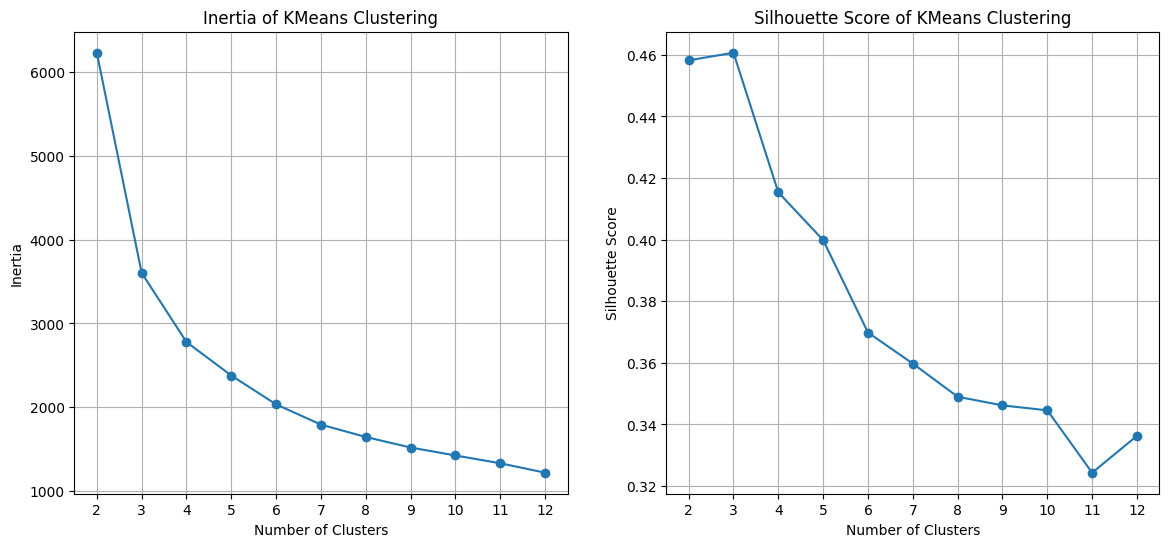

In [39]:
# Define the maximum number of clusters to test
max_k = 12

# Initialize lists to store inertia and silhouette scores for each k
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)  # Range of k values to evaluate

# Iterate over each k value to apply KMeans clustering
for k in k_values:
    # Initialize KMeans with the current number of clusters (k), fixed random state, and max iterations
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    # Fit the KMeans model and predict cluster labels
    cluster_labels = kmeans.fit_predict(scaled_data_2011)

    # Calculate the silhouette score and append it to the list
    sil_score = silhouette_score(scaled_data_2011, cluster_labels)
    silhouette_scores.append(sil_score)

    # Append the inertia (sum of squared distances to nearest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot inertia values
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Inertia of KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score of KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

# Display the plots
plt.show()

### K-Means Clustering Evaluation

#### Inertia Plot
- **Description**: The inertia plot shows the sum of squared distances from each point to its closest cluster center as the number of clusters increases.
- **Interpretation**: The "elbow" method suggests an optimal clustering point where the rate of decrease sharply changes. In this plot, the elbow is identified around 3 clusters, indicating a reasonable point to stop adding clusters due to diminishing returns in improving clustering compactness.

#### Silhouette Score Plot
- **Description**: The silhouette score measures how well-separated the clusters are, ranging from -1 to 1. Higher scores indicate better-defined clusters.
- **Interpretation**: The plot shows that silhouette scores are highest at 2 clusters, but given the elbow at 3 clusters in the inertia plot, choosing 3 clusters still provides a good balance between compactness and separation.

#### Conclusion
- **Cluster Selection**: Based on the analysis, 3 clusters have been chosen to effectively balance compactness and separation. This allows for meaningful segmentation with manageable complexity.
- **Implications**: Selecting 3 clusters supports effective customer segmentation, enabling targeted marketing strategies and providing insights into customer behavior patterns.

In [40]:
# Initialize the KMeans algorithm with 4 clusters, a specified random state for reproducibility, and a maximum of 1000 iterations
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

# Fit the KMeans model to the scaled data and predict cluster labels for each data point
cluster_labels = kmeans.fit_predict(scaled_data_2011)

# Output the cluster labels for each data point
cluster_labels

array([3, 0, 1, ..., 1, 0, 3], shape=(3863,), dtype=int32)

In [41]:
# Assign the cluster labels to a new column 'Cluster' in the non_outliers_df_2011 DataFrame
non_outliers_df_2011["Cluster"] = cluster_labels

non_outliers_df_2011.head()

/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_79746/3722880721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df_2011["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1


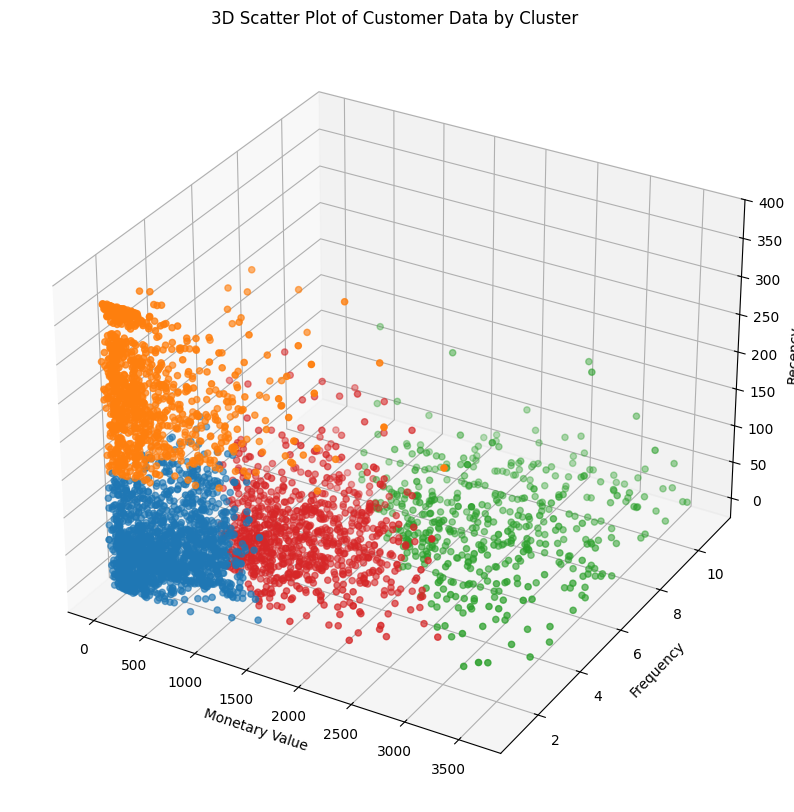

In [42]:
# Define a color mapping for each cluster using a dictionary
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

# Map the cluster numbers to their respective colors for visualization
colors = non_outliers_df_2011['Cluster'].map(cluster_colors)

# Create a 3D scatter plot with specified figure size
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the data points with colors based on their cluster membership
scatter = ax.scatter(non_outliers_df_2011['MonetaryValue'], 
                     non_outliers_df_2011['Frequency'], 
                     non_outliers_df_2011['Recency'], 
                     c=colors,  # Apply mapped colors to each point
                     marker='o')

# Label the axes for clear interpretation of the plot
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

# Set the title of the plot for context
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# Display the plot
plt.show()

### 3D Scatter Plot of Customer Data by Cluster

#### Overview
The 3D scatter plot visualizes customer segmentation, clustering data points based on Monetary Value, Frequency, and Recency. Each cluster is represented by a distinct color to highlight different customer groups.

#### Interpretation
- **Cluster Colors**:
  - **Blue**: Represents one customer segment with specific purchasing behaviors.
  - **Orange**: Another distinct group, indicating varying patterns in recency, frequency, or spending.
  - **Green**: Suggests a segment characterized by unique activity in one or more dimensions.
  - **Red**: Highlights a final group, offering insight into a separated behavior set.
  
- **Dimension Analysis**:
  - **Monetary Value**: Spread across the plot, indicating variation in spending across clusters.
  - **Frequency and Recency**: Clusters are distributed, showing differences in customer engagement and purchase patterns.

#### Implications
- **Segmentation Strategy**: The visualization aids in understanding which segments require targeted marketing efforts.
- **Cluster Characteristics**: Examination of cluster attributes can help design personalized promotions and improve customer retention based on identified behaviors.

This plot provides a visual foundation for targeted customer analysis, allowing businesses to tailor strategies to distinct customer groups.

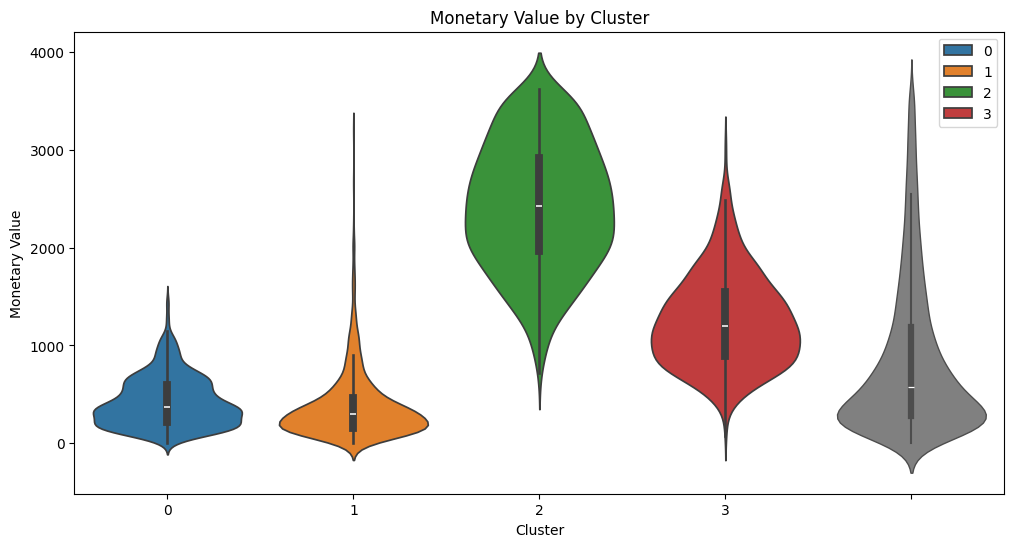

In [43]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2011['Cluster'], 
               y=non_outliers_df_2011['MonetaryValue'], 
               palette=cluster_colors,
               hue=non_outliers_df_2011['Cluster'])  # Color by cluster
sns.violinplot(y=non_outliers_df_2011['MonetaryValue'], color='gray', linewidth=1.0)

# Titles and labels
plt.title('Monetary Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')

# Show plot
plt.show()

### Violin Plot of Monetary Value by Cluster

#### Overview
The violin plot displays the distribution of monetary value across different customer clusters, providing insights into the spending patterns within each group.

#### Interpretation
- **Cluster 0 (Blue)**: 
  - Distribution is centered around lower monetary values.
  - Indicates a segment of low-spending customers.

- **Cluster 1 (Orange)**:
  - Similar to Cluster 0, with a slightly narrower spread.
  - Represents another low-spending group with limited variance in spending.

- **Cluster 2 (Green)**:
  - Shows a much wider distribution, indicating higher spending variability.
  - Includes high-spending customers, making it a significant segment in terms of revenue potential.

- **Cluster 3 (Red)**:
  - Distribution indicates moderate spending with less variance than Cluster 2.
  - Represents mid-range spending behavior.

#### Implications
- **Targeting High-Value Segments**: Cluster 2 is key for focusing marketing efforts to maximize revenue.
- **Customizing Offers**: Clusters 0 and 1 could benefit from incentivized promotion to encourage higher spending.
- **Balanced Strategy**: Tailoring strategies to each cluster can enhance customer engagement and increase overall lifetime value.

This analysis helps in identifying the spending behavior patterns across different customer segments for better strategic planning.

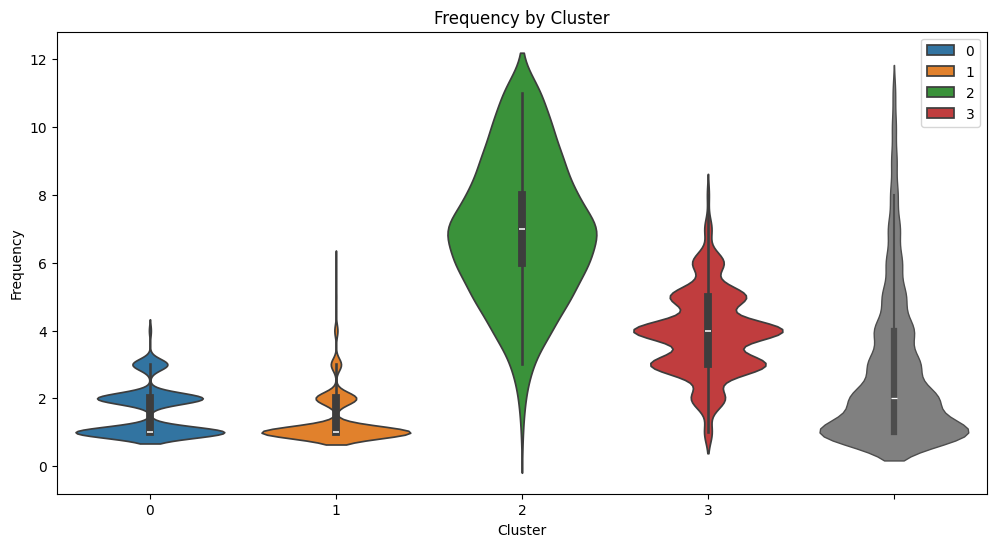

In [44]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2011['Cluster'], 
               y=non_outliers_df_2011['Frequency'], 
               palette=cluster_colors,
               hue=non_outliers_df_2011['Cluster'])  # Color by cluster
sns.violinplot(y=non_outliers_df_2011['Frequency'], color='gray', linewidth=1.0)

# Titles and labels
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Show plot
plt.show()

### Violin Plot of Frequency by Cluster

#### Overview
The violin plot illustrates the distribution of purchase frequency within each customer cluster, shedding light on how often different segments make purchases.

#### Interpretation
- **Cluster 0 (Blue)**: 
  - Frequency is centered around lower values.
  - Represents infrequent purchasers, indicating less engaged customers.

- **Cluster 1 (Orange)**:
  - Similar to Cluster 0 with a slightly wider spread.
  - Also indicative of low purchase frequency with minimal variation.

- **Cluster 2 (Green)**:
  - Displays a wide distribution, indicating higher variability in purchase frequency.
  - Includes frequent purchasers, highlighting a highly engaged customer segment.

- **Cluster 3 (Red)**:
  - Distribution shows moderate frequency with less variation than Cluster 2.
  - Represents customers with a mid-level engagement.

#### Implications
- **Boosting Engagement**: Clusters 0 and 1 could be targeted with campaigns to enhance engagement and purchase frequency.
- **Capitalize on Frequent Buyers**: Cluster 2 should be a focus for loyalty programs to sustain high engagement levels.
- **Custom Strategies**: Tailoring efforts based on each cluster's frequency can optimize retention and increase purchase occasions.

This analysis facilitates understanding of customer engagement across segments, informing targeted strategies to enhance frequency.

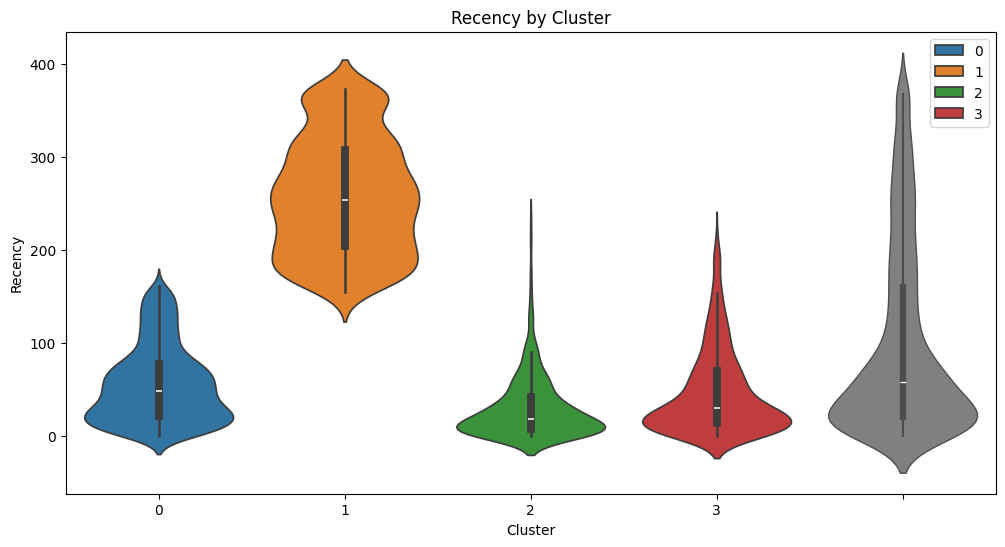

In [45]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2011['Cluster'], 
               y=non_outliers_df_2011['Recency'], 
               palette=cluster_colors,
               hue=non_outliers_df_2011['Cluster'])  # Color by cluster
sns.violinplot(y=non_outliers_df_2011['Recency'], color='gray', linewidth=1.0)


# Titles and labels
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Show plot
plt.show()

### Violin Plot of Recency by Cluster

#### Overview
The violin plot illustrates the distribution of recency within each customer cluster, offering insights into how recently different segments have made purchases.

#### Interpretation
- **Cluster 0 (Blue)**: 
  - Recency is centered around lower values, indicating recent purchases.
  - Represents highly engaged customers who have bought recently.

- **Cluster 1 (Orange)**:
  - Displays a wider distribution with higher recency values.
  - Indicates a segment with less recent engagement, suggesting potential for reactivation strategies.

- **Cluster 2 (Green)**:
  - Recency is relatively low, similar to Cluster 0.
  - Includes recent buyers, showing current engagement.

- **Cluster 3 (Red)**:
  - Shows a mix of recency with a moderate spread.
  - Represents mid-level engagement, requiring balanced retention efforts.

#### Implications
- **Re-engagement**: Cluster 1 may benefit from targeted reactivation campaigns.
- **Maintain Engagement**: Clusters 0 and 2 should be targeted for retention to sustain their current activity levels.
- **Balanced Approach**: Cluster 3 may require a combination of strategies to enhance ongoing engagement.

This analysis helps identify customer segments based on their recent activity, guiding strategies for engagement and reactivation.

### Cluster Analysis and Strategic Actions

#### Cluster 0 (Blue): "Retain"
- **Rationale**: Customers who have made recent purchases and often, but could increase frequency.
- **Action**: Strengthen loyalty with personalized offers and regular engagement strategies to boost purchase frequency.

#### Cluster 1 (Orange): "Re-Engage"
- **Rationale**: Customers with higher recency, indicating they haven't purchased recently. Require re-engagement to reactivate.
- **Action**: Deploy targeted marketing campaigns and special promotions to encourage them to make new purchases.

#### Cluster 2 (Green): "Nurture"
- **Rationale**: Frequent purchasers with moderate spending, recently active. Potential for growth through increased engagement.
- **Action**: Focus on building relationships and providing incentives to further increase their purchase value and frequency.

#### Cluster 3 (Red): "Reward"
- **Rationale**: Consistent purchasing behavior with balanced frequency and recency. Vital to maintain engagement to prevent drop-off.
- **Action**: Reward loyalty with exclusive offers and recognize them through special programs to keep their activity steady.

### Summary of Cluster Names:
- **Cluster 0 (Blue)**: "Retain"
- **Cluster 1 (Orange)**: "Re-Engage"
- **Cluster 2 (Green)**: "Nurture"
- **Cluster 3 (Red)**: "Reward"

In [46]:
# Identify indices where both monetary and frequency outliers overlap
overlap_indices = monetary_outliers_2011.index.intersection(frequency_outliers_df_2011.index)

# Separate outliers into three categories:
# 1. Monetary outliers only, excluding overlap
monetary_only_outliers = monetary_outliers_2011.drop(overlap_indices)

# 2. Frequency outliers only, excluding overlap
frequency_only_outliers = frequency_outliers_df_2011.drop(overlap_indices)

# 3. Outliers in both monetary and frequency, identified by overlap
monetary_and_frequency_outliers = monetary_outliers_2011.loc[overlap_indices]

# Assign unique cluster labels for categorization:
# -1 for monetary-only outliers
monetary_only_outliers["Cluster"] = -1

# -2 for frequency-only outliers
frequency_only_outliers["Cluster"] = -2

# -3 for outliers in both categories
monetary_and_frequency_outliers["Cluster"] = -3

# Combine all categorized outliers into a single DataFrame
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

# Display the combined DataFrame of outlier clusters
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


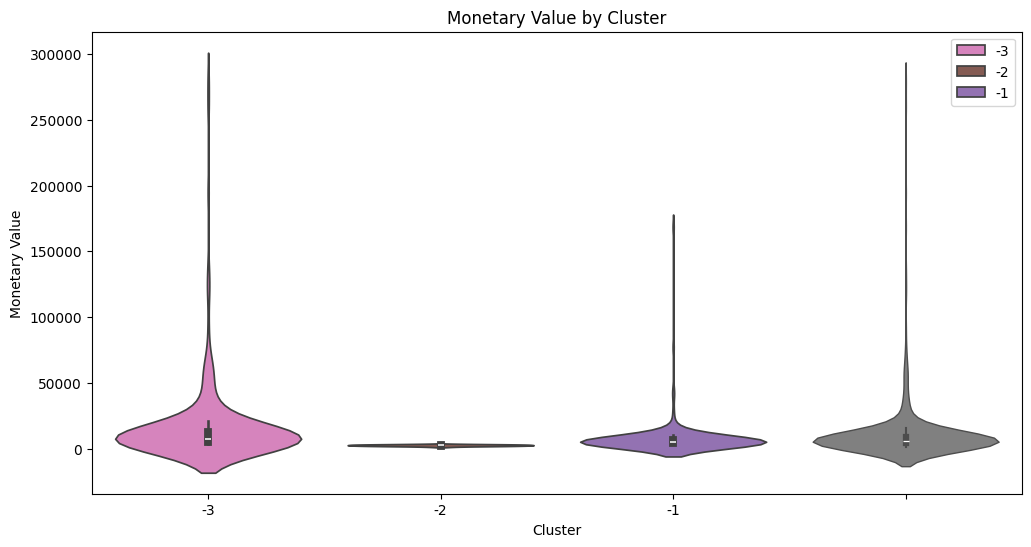

In [47]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.show()

# Analysis of the Violin Plot: Monetary Value by Cluster

## Overview
This violin plot illustrates the distribution of monetary values across three different clusters labeled -3, -2, and -1. The clusters are analyzed in terms of their monetary values, and the plot helps in understanding the distribution and density of values within each cluster.

## Cluster Analysis

### Cluster -3
- **Distribution:** The distribution of monetary values in Cluster -3 is wide with a high range.
- **Density:** There is a high concentration of data points around the lower values, with a few extremely high outliers.
- **Median:** The black box plot within the violin shows that the median value is relatively low compared to the entire range.

### Cluster -2
- **Distribution:** Cluster -2 has a very narrow distribution of monetary values.
- **Density:** The data is heavily concentrated around one smaller range.
- **Median:** The median is close to the bulk of the values, suggesting uniformity.

### Cluster -1
- **Distribution:** This cluster has a wider range of monetary values than Cluster -2 but narrower than Cluster -3.
- **Density:** There is a clear peak in the density at a lower monetary value, with a significant drop-off as values increase.
- **Median:** The median value appears to be moderate, suggesting that while there are higher values, they are not the majority.

## General Insights
- **Outliers and Variability:** Clusters -3 and -1 show significant variability and presence of outliers, whereas Cluster -2 is more stable and concentrated.
- **Central Tendency:** The median is lowest in Cluster -2, indicating more consistent lower values compared to Clusters -3 and -1.

## Conclusion
The plot effectively showcases how monetary values are spread across clusters, with Cluster -3 having a wider range and outliers, and Cluster -2 displaying more uniform variability. Understanding these distributions can aid in deriving insights into customer segmentation or other categorical groupings.

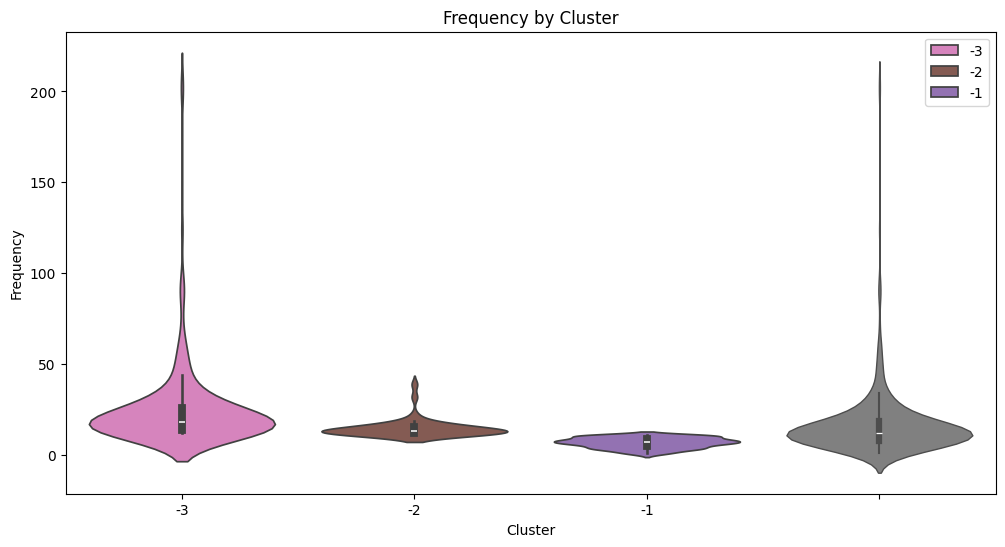

In [48]:
plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.show()


# Analysis of the Violin Plot: Frequency by Cluster

## Overview
This violin plot presents the distribution of frequency across three distinct clusters labeled -3, -2, and -1. It visualizes how frequency values vary within each cluster, highlighting density and central tendency.

## Cluster Analysis

### Cluster -3
- **Distribution:** Cluster -3 displays a broad range of frequency values.
- **Density:** There is a high density near lower frequencies, with some instances reaching higher frequencies as outliers.
- **Median:** The median frequency is relatively low, positioned closer to the lower end of the range.

### Cluster -2
- **Distribution:** This cluster shows a narrow and more uniform spread of frequency values.
- **Density:** The peak density is tightly focused, indicating consistency in frequency.
- **Median:** The median is close to the central cluster of data points, reinforcing uniformity.

### Cluster -1
- **Distribution:** The frequency values in Cluster -1 are spread wider than in Cluster -2 but not as extensively as in Cluster -3.
- **Density:** A clear peak exists around a lower frequency, with a diminishing density as the frequency increases.
- **Median:** The median is moderately positioned, indicating some higher value frequencies but not predominating.

## General Insights
- **Outliers and Variability:** Clusters -3 and -1 contain more variability and outliers compared to the more uniform Cluster -2.
- **Central Tendency:** Cluster -2 shows the lowest median and least spread, suggesting consistent frequency values.

## Conclusion
This plot effectively highlights the variance in frequency distribution across clusters. Cluster -3 shows a large spread and several outliers, Cluster -1 maintains moderate variability, and Cluster -2 exhibits a concentration around a consistent frequency.

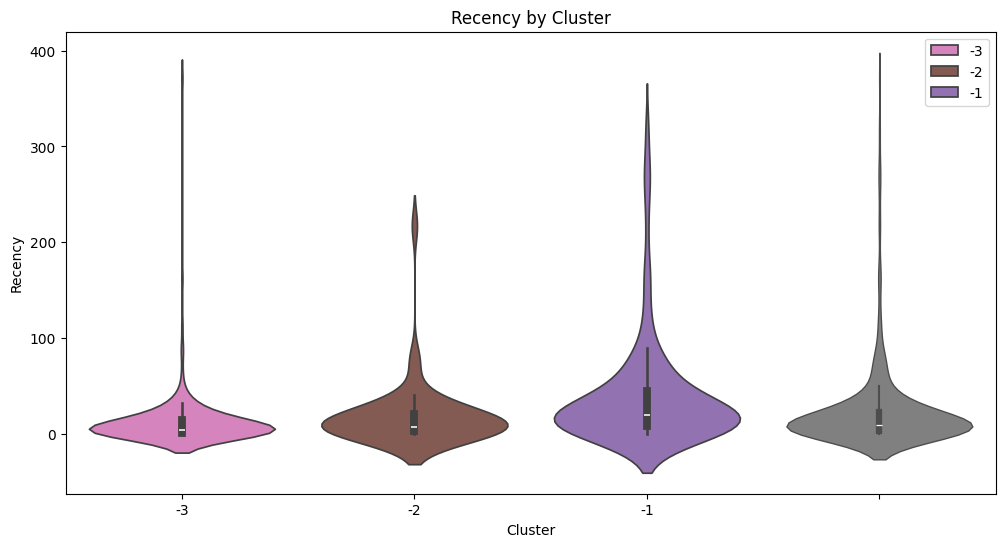

In [49]:
plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.show()

# Analysis of the Violin Plot: Recency by Cluster

## Overview
This violin plot depicts the distribution of recency across three clusters labeled -3, -2, and -1. It visualizes variation in recency within each cluster, highlighting both density and central tendency.

## Cluster Analysis

### Cluster -3
- **Distribution:** Recency in Cluster -3 spans a wide range, with numerous lower values.
- **Density:** High density is present around the lower recency values, with occasional high outliers.
- **Median:** The median value is relatively low, indicating that most values are clustered near the start of the range.

### Cluster -2
- **Distribution:** Cluster -2 shows moderately wide distribution of recency values.
- **Density:** There is a noticeable concentration at lower values, with a few peaks indicating variability.
- **Median:** The median is lower, reflecting that most data is concentrated towards lesser recency.

### Cluster -1
- **Distribution:** This cluster has a wider spread compared to the other clusters, with significant outliers.
- **Density:** There is a significant concentration around the lower recency values.
- **Median:** The median recency is higher than the other clusters, indicating a wider distribution of recent activity.

## General Insights
- **Outliers and Variability:** Clusters -3 and -1 show strong variability with considerable outliers, whereas Cluster -2 is slightly more uniform.
- **Central Tendency:** The median is lowest in Cluster -3, indicating more consistent recency values at the lower end.

## Conclusion
This plot highlights variations in recency distribution across the clusters. Clusters -3 and -1 show significant variability and multiple outliers, while Cluster -2 offers slightly less variability. Understanding these patterns can aid in making relevant decisions in fields like customer behavior analysis.

# Broad Overview of Clusters and Strategic Insights

The analysis of the monetary value, frequency, and recency across the three clusters has revealed distinct characteristics that can be leveraged for customer management strategies. Each cluster presents unique opportunities through its outlier behavior in monetary and frequency dimensions.

## Outlier Cluster Strategies

### Cluster -1 (Monetary Outliers) - **PAMPER**
- **Characteristics**: High spenders with large but infrequent purchases.
- **Potential Strategy**: 
  - Enhance loyalty through personalized offers and luxury services tailored to their high spending capacity.
  - Consider exclusive access and premium customer service to maintain engagement.

### Cluster -2 (Frequency Outliers) - **UPSELL**
- **Characteristics**: Frequent buyers who have lower spending per purchase.
- **Potential Strategy**: 
  - Leverage their frequent engagement by offering loyalty programs, bundle deals, or upselling opportunities. 
  - Encourage higher spending through incentives for larger purchases and exclusive member benefits.

### Cluster -3 (Monetary & Frequency Outliers) - **DELIGHT**
- **Characteristics**: Top-tier customers with both high spending and frequent purchases.
- **Potential Strategy**: 
  - Implement VIP programs and offer exclusive deals to recognize and retain their loyalty. 
  - Provide personalized experiences that cater to their preferences, ensuring they feel valued and motivated to continue their engagement.

These strategic approaches, tailored to the specific characteristics of each outlier cluster, aim to optimize customer relationships and drive continued success.

In [50]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [51]:
full_clustering_df = pd.concat([non_outliers_df_2011, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


In [52]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3,REWARD
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0,RETAIN
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1,RE-ENGAGE
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2,NURTURE
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1,RE-ENGAGE
...,...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3,DELIGHT
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT


/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_79746/1237300352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')


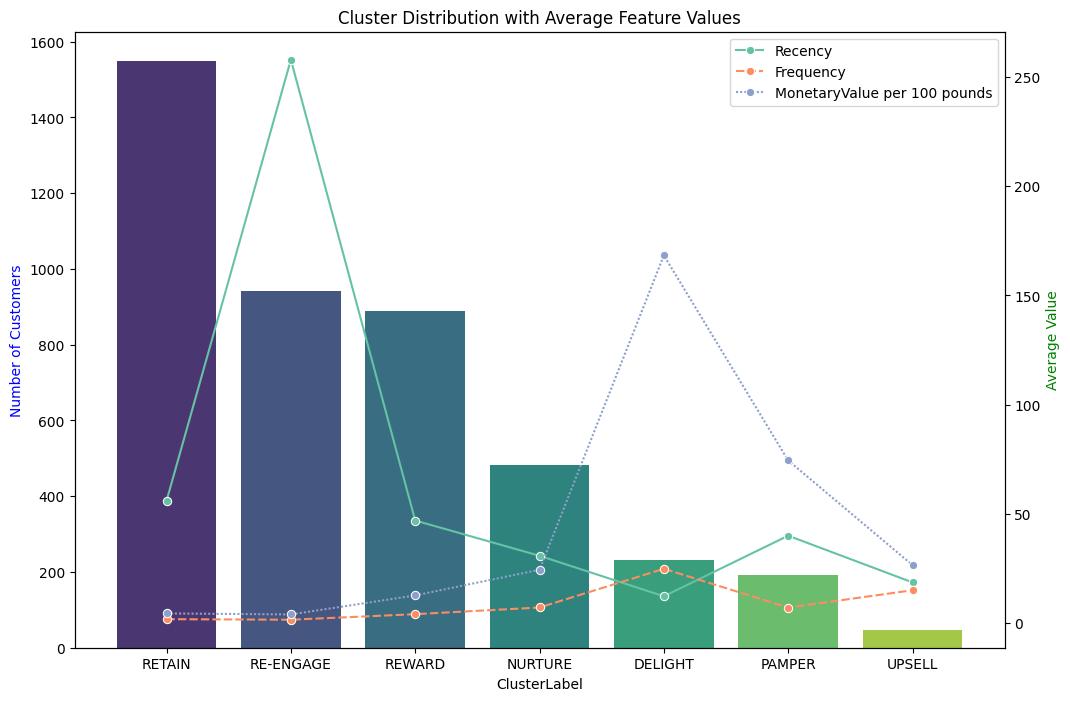

In [53]:
# Count the number of customers in each cluster
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

# Calculate monetary value in hundreds for easier scaling and readability
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00

# Compute the mean of 'Recency', 'Frequency', and 'MonetaryValue per 100 pounds' for each cluster
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Create a figure and a bar plot for cluster distribution
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Create a second y-axis to plot the average feature values for each cluster
ax2 = ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

# Display the combined plot
plt.show()

# Cluster Distribution with Average Feature Values

## Overview
This graph presents the distribution of customers across different strategies along with average values for recency, frequency, and monetary value (per 100 pounds) for each cluster. It provides insights into how customers are segmented and the key characteristics of each group.

## Graph Analysis

### Customer Distribution
- **RETAIN**: The largest number of customers is in the RETAIN cluster, indicating a priority for maintaining existing relationships.
- **RE-ENGAGE and REWARD**: Follow in numbers, suggesting significant groups focused on re-engagement and rewarding loyal behaviors.
- **NURTURE, DELIGHT, PAMPER, UPSELL**: Smaller customer bases, reflecting more specific or niche strategies.

### Average Feature Values
- **Recency**: 
  - Peaks significantly in the RETAIN cluster, indicating that these customers have engaged recently.
  - Decreases progressively through REWARD, NURTURE, and UPSELL.
- **Frequency**: 
  - A relatively steady value across most clusters with a slight peak in the DELIGHT strategy.
- **Monetary Value**: 
  - Highest in the DELIGHT cluster, reflecting the high spending characteristic of these customers.
  - Drops in other clusters, especially prominent in the UPSELL strategy.

## Strategic Insights
- **RETAIN Strategy**: Focus on recent engagement with many customers to maintain relationships.
- **DELIGHT Strategy**: Represents high-value customers; invest in keeping them satisfied with tailored offers.
- **UPSELL Strategy**: Small, but potential for growth through strategic cross-selling and upselling.

The graph underscores the necessity of diversified strategies tailored to each cluster's unique characteristics, optimizing both engagement and revenue potential.